# Exploratory Data Analysis
### 1. Benign URL Data 
- Data Type
- Data Shape

### 2. Phishin URL Data
- Data Type
- Data Shape


### 3. Data imbalance



### 4. Text sequence feature
- URL 내 키워드-의존성을 제외한 문자 시퀀스 특징이 군집을 구성하는 것을 보이므로 키워드 수준이 아닌 문자수준 모델링의 가능성




-----------------------------------------------------
### 1. Benign Data
- Data Type
- Data Shape

In [13]:
#Copyright 2019, Seokjun Bu, Softcomputing LAB all rights reserved.
import os
import pandas as pd
import numpy as np
from urllib.parse import urlparse, parse_qs
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from PIL import Image

In [6]:
df_benign = pd.read_csv("../input/url_0.csv")
df_benign.tail()

,1,http://www.liquidgeneration.com/,Adult
1048570,1048572,https://www.nucleics.com/peaktrace/,Science
1048571,1048573,http://www.phenosystems.com,Science
1048572,1048574,http://www.thebiolog.com,Science
1048573,1048575,http://code.google.com/p/openbiomind/,Science
1048574,1048576,http://va-genex.sourceforge.net/,Science


In [7]:
df_benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
1                                   1048575 non-null int64
http://www.liquidgeneration.com/    1048573 non-null object
Adult                               1048575 non-null object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [8]:
df_benign.shape

(1048575, 3)

### 2. Pishing Data
- Data Type
- Data Shape

In [9]:
df_pishing = pd.read_csv("../input/url_1.csv")
df_pishing.tail()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
15256,1095720,https://sites.google.com/site/freehabbocoinsgb...,http://www.phishtank.com/phish_detail.php?phis...,2010-12-30T12:13:46+00:00,yes,2010-12-30T15:29:19+00:00,yes,Sulake Corporation
15257,876840,http://mundovirtualhabbo.blogspot.com/2009_01_...,http://www.phishtank.com/phish_detail.php?phis...,2009-12-03T10:40:26+00:00,yes,2009-12-03T23:56:01+00:00,yes,Sulake Corporation
15258,549159,http://aijcs.blogspot.com/2005/03/colourful-li...,http://www.phishtank.com/phish_detail.php?phis...,2008-11-07T15:04:00+00:00,yes,2011-09-03T19:15:33+00:00,yes,Other
15259,530149,http://tnet.at.ua/index/0-13,http://www.phishtank.com/phish_detail.php?phis...,2008-10-20T09:43:48+00:00,yes,2008-10-21T00:33:18+00:00,yes,Other
15260,524013,http://tudu-free.blogspot.com/2008/02/jogos-ja...,http://www.phishtank.com/phish_detail.php?phis...,2008-10-10T12:16:44+00:00,yes,2008-10-12T09:08:49+00:00,yes,Other


In [10]:
df_pishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15261 entries, 0 to 15260
Data columns (total 8 columns):
phish_id             15261 non-null int64
url                  15261 non-null object
phish_detail_url     15261 non-null object
submission_time      15261 non-null object
verified             15261 non-null object
verification_time    15261 non-null object
online               15261 non-null object
target               15261 non-null object
dtypes: int64(1), object(7)
memory usage: 953.9+ KB


In [11]:
df_pishing.shape

(15261, 8)

### 3. Data Imbalance

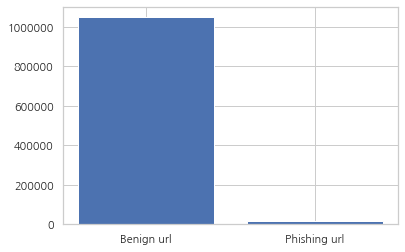

In [14]:
names = ['Benign url', 'Phishing url']
values = [df_benign.shape[0], df_pishing.shape[0]]

plt.bar(names, values)
plt.show()

### 4. Text sequence feature
- URL 내 키워드-의존성을 제외한 문자 시퀀스 특징이 군집을 구성하는 것을 보인다.

In [ ]:
# data = np.load('../input/dataset_2_char_cat_45000_15000_140.npy')
# X, Y = data[:, 1:], data[:, 0]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=11)
# Y_train_cat, Y_test_cat = to_categorical(Y_train), to_categorical(Y_test)
# classifier_model = load_model('/content/drive/My Drive/test_colab/densenet.h5')
# Y_test_hat = classifier_model.predict(X_test)
# # t-SNE
# n_samples = 5000;
# model_tsne = TSNE(n_components=2, random_state=1, perplexity=15, n_iter=2000)
# features, labels = X_test[-1*n_samples:,1:], np.argmax(Y_test_hat[-1*n_samples:], axis=1)
# tsne_output = model_tsne.fit_transform(features)
# tsne_x, tsne_y = tsne_output[:, 0], tsne_output[:, 1]
# dataset_tsne = np.vstack((tsne_x, tsne_y))
# dataset_tsne = np.rollaxis(dataset_tsne, 1)
# scaler = preprocessing.StandardScaler().fit(dataset_tsne)
# dataset_tsne_scaled = scaler.transform(dataset_tsne)
# tsne_x, tsne_y = dataset_tsne_scaled[:, 0], dataset_tsne_scaled[:, 1]
# plt.figure(figsize=(10, 10)), plt.xticks([]), plt.yticks([])
# h = .02  # step size in the mesh
# x_min, x_max = tsne_x.min()-0.5, tsne_x.max()+0.5
# y_min, y_max = tsne_y.min()-0.5, tsne_y.max()+0.5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# clf = KNeighborsClassifier(n_neighbors=10, leaf_size=10, p=1, algorithm='kd_tree', weights='uniform')
# clf.fit(dataset_tsne_scaled, labels)
# Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
# Z_multi = np.zeros((xx.ravel().shape[0]))
# for pixel in range(xx.ravel().shape[0]):
#     max_class = 0
#     for c in range(2):
#         if(Z[pixel, max_class]<Z[pixel, c]):
#             max_class = c
#             Z_multi[pixel] = c
#             break
# Z_multi_scaled = np.zeros((xx.ravel().shape[0]))
# Z_multi_max, Z_multi_min = Z_multi.max(), Z_multi.min()
# for pixel in range(xx.ravel().shape[0]):
#     if(Z_multi[pixel]!=0):
#         Z_multi_scaled[pixel] = (Z_multi[pixel]-Z_multi_min)/(Z_multi_max-Z_multi_min)
# scale = 0.1
# Z_multi_scaled *= scale
# Z_multi_reshaped = Z_multi_scaled.reshape(xx.shape)
# height = 12*16
# Z_multi_reshaped_height = Z_multi_reshaped + height
# plt.contourf(xx, yy, Z_multi_reshaped_height, zdir='z', cmap=plt.cm.coolwarm, alpha=0.4)
# plt.scatter(tsne_x, tsne_y, s=np.pi*(2.5)**2, c=labels, cmap=plt.cm.coolwarm, alpha=0.7, edgecolors='black');
# plt.show()

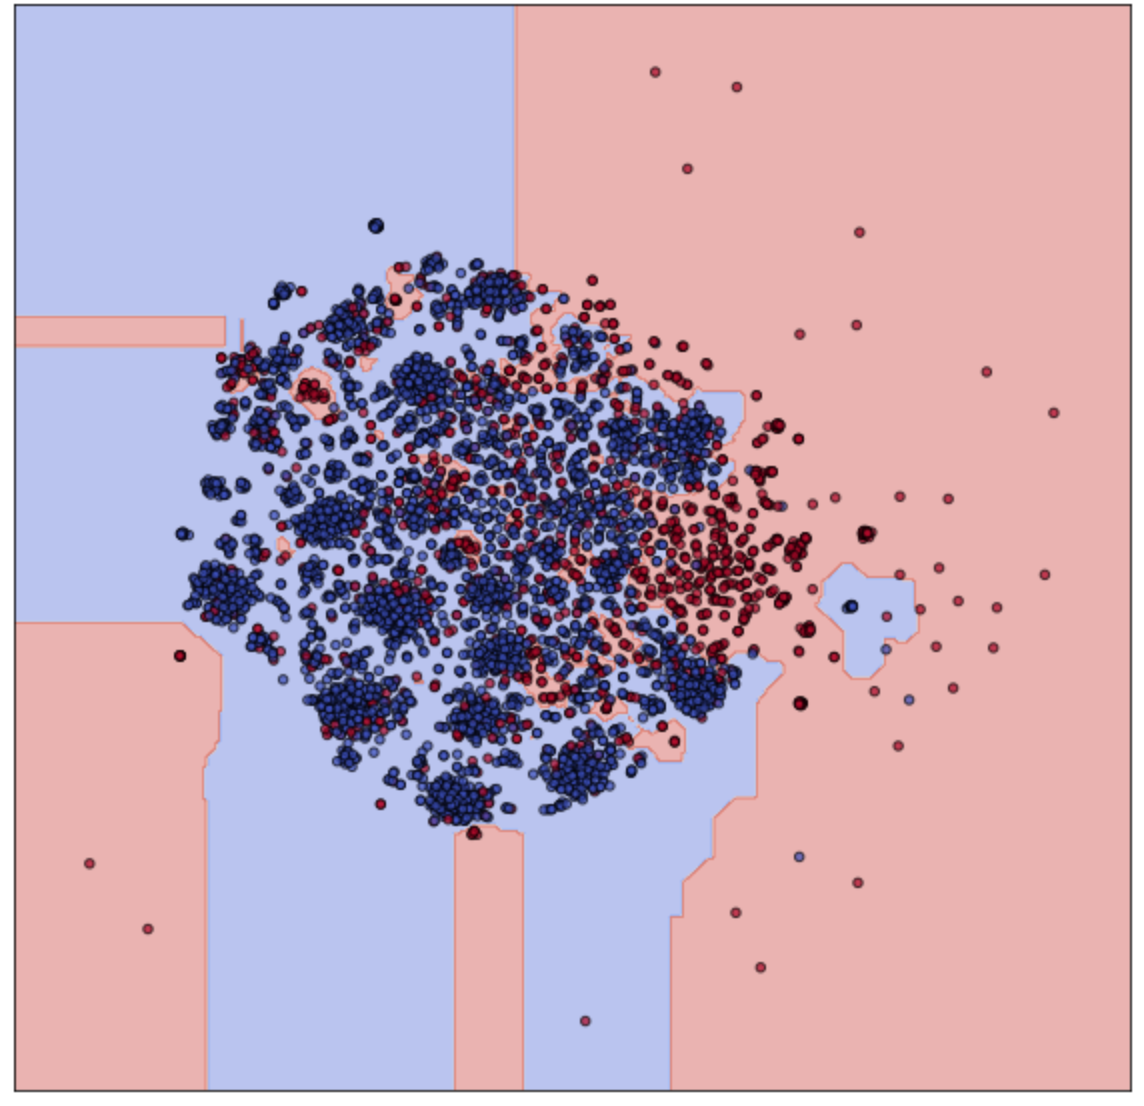

In [4]:
Image.open('../input/t-sne.png')